<a href="https://colab.research.google.com/github/alexandranlugo/Correlation-between-Dietary-Habits-and-Cardiovascular-Health-Outcomes/blob/main/Correlation_between_Dietary_Habits_and_Cardiovascular_Health_Outcomes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/CVD_cleaned.csv")

In [ ]:
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [ ]:
missing_values = data.isnull().sum()
summary_statistics = data.describe()

missing_values, summary_statistics

(General_Health                  0
 Checkup                         0
 Exercise                        0
 Heart_Disease                   0
 Skin_Cancer                     0
 Other_Cancer                    0
 Depression                      0
 Diabetes                        0
 Arthritis                       0
 Sex                             0
 Age_Category                    0
 Height_(cm)                     0
 Weight_(kg)                     0
 BMI                             0
 Smoking_History                 0
 Alcohol_Consumption             0
 Fruit_Consumption               0
 Green_Vegetables_Consumption    0
 FriedPotato_Consumption         0
 dtype: int64,
          Height_(cm)    Weight_(kg)            BMI  Alcohol_Consumption  \
 count  308854.000000  308854.000000  308854.000000        308854.000000   
 mean      170.615249      83.588655      28.626211             5.096366   
 std        10.658026      21.343210       6.522323             8.199763   
 min        91.0

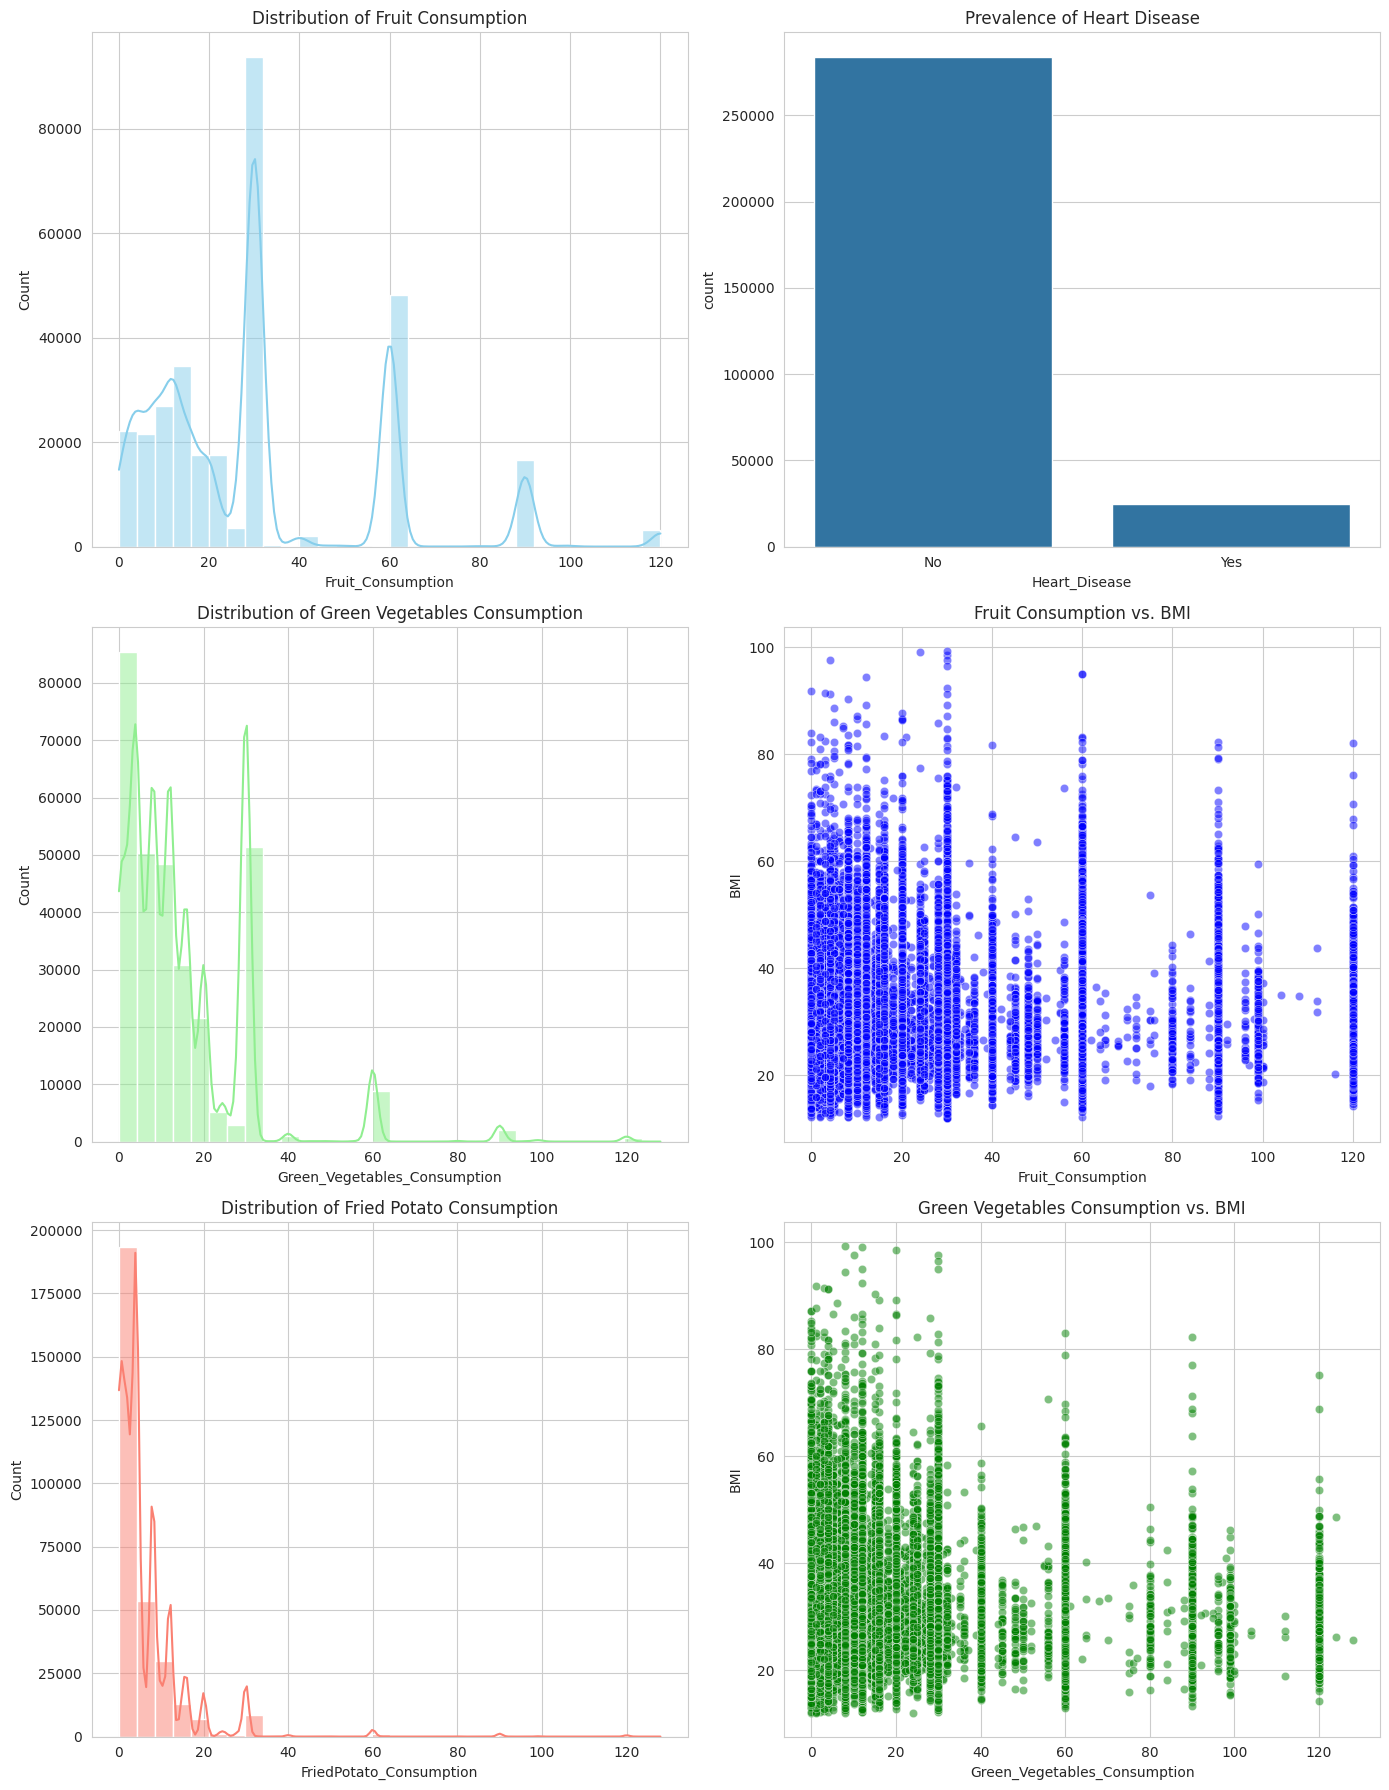

In [ ]:
# aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize a figure for subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 18))

# Distribution plots for dietary habits
sns.histplot(data['Fruit_Consumption'], bins=30, ax=axs[0, 0], color='skyblue', kde=True)
axs[0, 0].set_title('Distribution of Fruit Consumption')

sns.histplot(data['Green_Vegetables_Consumption'], bins=30, ax=axs[1, 0], color='lightgreen', kde=True)
axs[1, 0].set_title('Distribution of Green Vegetables Consumption')

sns.histplot(data['FriedPotato_Consumption'], bins=30, ax=axs[2, 0], color='salmon', kde=True)
axs[2, 0].set_title('Distribution of Fried Potato Consumption')

# Prevalence of Heart Disease
sns.countplot(x='Heart_Disease', data=data, ax=axs[0, 1])
axs[0, 1].set_title('Prevalence of Heart Disease')

# Relationship between Fruit Consumption and BMI
sns.scatterplot(x='Fruit_Consumption', y='BMI', data=data, ax=axs[1, 1], color='blue', alpha=0.5)
axs[1, 1].set_title('Fruit Consumption vs. BMI')

# Relationship between Green Vegetables Consumption and BMI
sns.scatterplot(x='Green_Vegetables_Consumption', y='BMI', data=data, ax=axs[2, 1], color='green', alpha=0.5)
axs[2, 1].set_title('Green Vegetables Consumption vs. BMI')

plt.tight_layout()
plt.show()


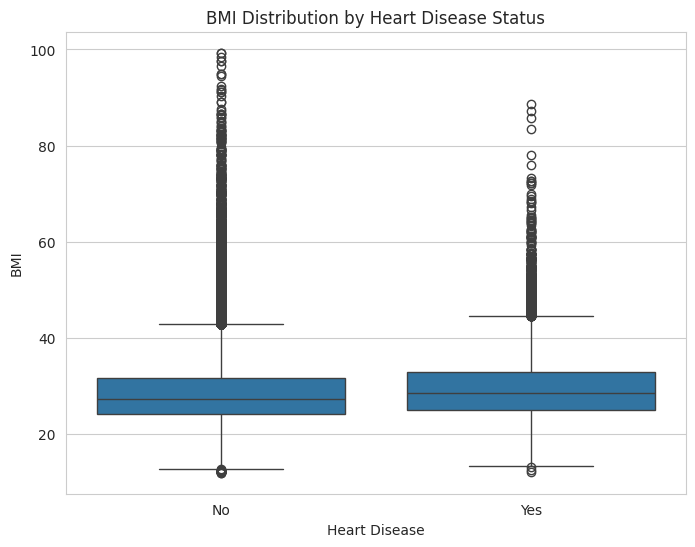

In [ ]:
# Boxplot for BMI distribution by Heart Disease status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Heart_Disease', y='BMI', data=data)
plt.title('BMI Distribution by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('BMI')
plt.show()

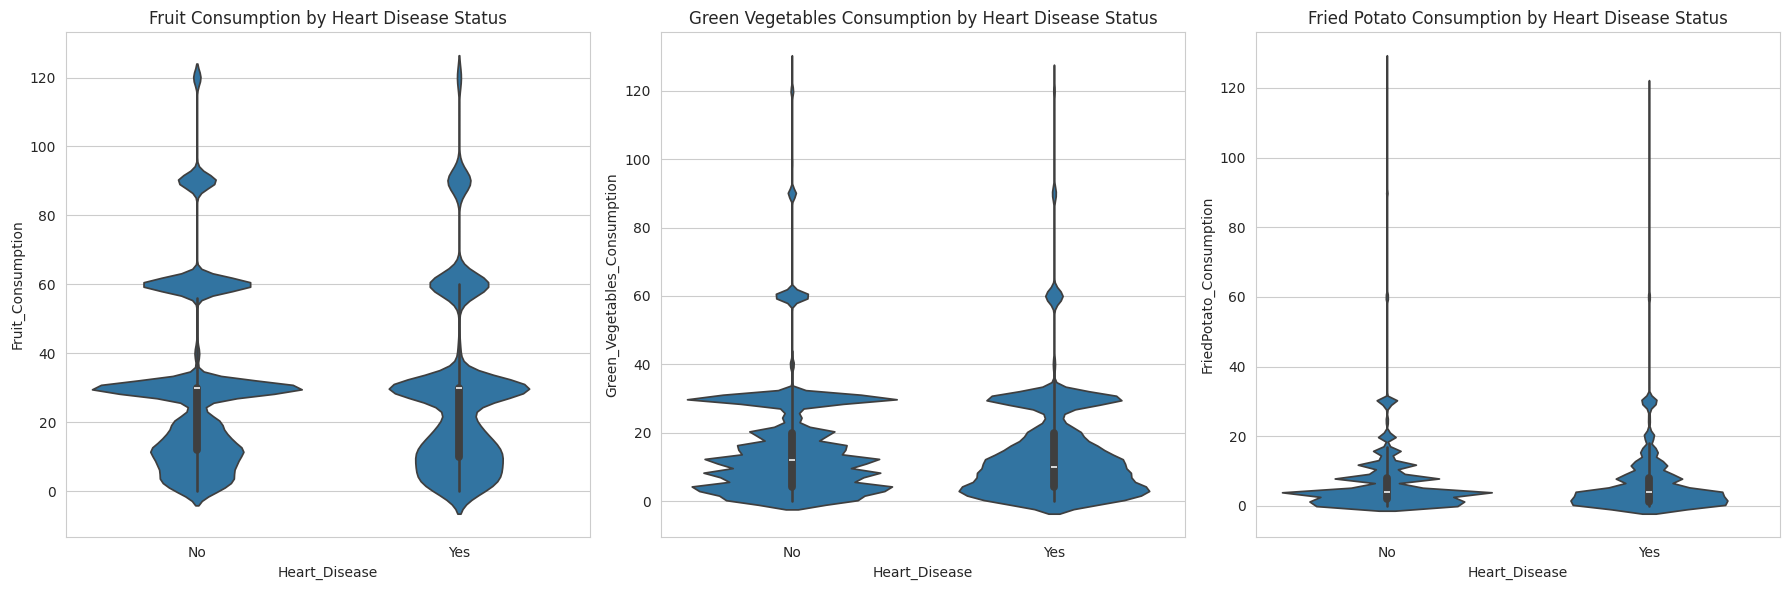

In [ ]:
# Violin plots for dietary habits by Heart Disease status
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.violinplot(x='Heart_Disease', y='Fruit_Consumption', data=data, ax=axs[0])
axs[0].set_title('Fruit Consumption by Heart Disease Status')

sns.violinplot(x='Heart_Disease', y='Green_Vegetables_Consumption', data=data, ax=axs[1])
axs[1].set_title('Green Vegetables Consumption by Heart Disease Status')

sns.violinplot(x='Heart_Disease', y='FriedPotato_Consumption', data=data, ax=axs[2])
axs[2].set_title('Fried Potato Consumption by Heart Disease Status')

plt.tight_layout()
plt.show()

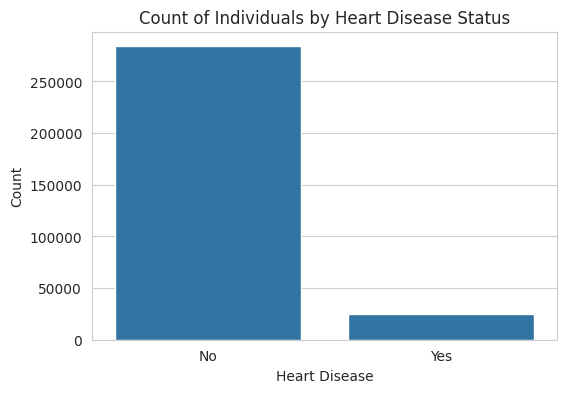

In [ ]:
# Count plot for Heart Disease status to see the distribution more clearly
plt.figure(figsize=(6, 4))
sns.countplot(x='Heart_Disease', data=data)
plt.title('Count of Individuals by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
# Convert 'Heart_Disease' to a binary variable for analysis
data['Heart_Disease'] = data['Heart_Disease'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
# Selecting features for the logistic regression model
features = ['Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'BMI']
X = data[features]
y = data['Heart_Disease']

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and training the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = model.predict(X_test_scaled)

In [ ]:
# Generating the classification report and confusion matrix
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

classification_rep, confusion_mat

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


('              precision    recall  f1-score   support\n\n           0       0.92      1.00      0.96     85101\n           1       0.00      0.00      0.00      7556\n\n    accuracy                           0.92     92657\n   macro avg       0.46      0.50      0.48     92657\nweighted avg       0.84      0.92      0.88     92657\n',
 array([[85101,     0],
        [ 7556,     0]]))

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score

# Adding age and sex as additional features for a more comprehensive model
# Converting 'Sex' to a binary variable for analysis (Male = 1, Female = 0)
data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'Male' else 0)

# Assuming 'Age_Category' is categorical, we convert it to dummy variables
age_dummies = pd.get_dummies(data['Age_Category'], prefix='Age')

# Adding the dummy variables to the dataset
X = pd.concat([X, data['Sex'], age_dummies], axis=1)

# Splitting the dataset into training and testing sets with the updated features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features including the new ones
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and training the logistic regression model with cross-validation to select the best regularization strength
model_cv = LogisticRegressionCV(cv=5, random_state=42, max_iter=1000)
model_cv.fit(X_train_scaled, y_train)

# Predicting probabilities on the test set for ROC AUC score
y_pred_prob = model_cv.predict_proba(X_test_scaled)[:, 1]

# Calculating the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

roc_auc


0.7713665135878871